### 'Date' / Datetime

In [ ]:
#Extract and Create Features for Day, Month, Day of week, weekday/weekend
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['DoW'] = df['Date'].dt.day_of_week
df['Weekend'] = (df['DoW']>4).map({True:1, False:0}) #Remap it to 0's and 1's - Convert it to a categorical, 1 = YES WEEKEND, 0 = NOT WEEKEND
#Other options to extract discussed: lambda and apply a function; create a categorical cat codes

In [ ]:
#Confirm that df['Weekend'] Works:
display((df['DoW']>4).map({True:1, False:0}).value_counts()) #confirm that the code is correct
#Confirm dataframe is changed
display(df.info())
df.head()

DoW
0    6264
1    2496
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int32         
 2   Hour                       8760 non-null   int32         
 3   Temperature(°C)            8760 non-null   float32       
 4   Humidity(%)                8760 non-null   int32         
 5   Wind speed (m/s)           8760 non-null   float32       
 6   Visibility (10m)           8760 non-null   int32         
 7   Dew point temperature(°C)  8760 non-null   float32       
 8   Solar Radiation (MJ/m2)    8760 non-null   float32       
 9   Rainfall(mm)               8760 non-null   float32       
 10  Snowfall (cm)              8760 non-null   float32       
 11  Holiday                    8760 non-null   category      
 12  Functi

None

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Spring,Summer,Winter,Day,Month,DoW,Weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.600000,0.0,0.0,0.0,0,1,0,0,1,1,12,4,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.600000,0.0,0.0,0.0,0,1,0,0,1,1,12,4,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.700001,0.0,0.0,0.0,0,1,0,0,1,1,12,4,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.600000,0.0,0.0,0.0,0,1,0,0,1,1,12,4,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.600000,0.0,0.0,0.0,0,1,0,0,1,1,12,4,0


## Investigate Features

### Hour
- Why were we getting the odd midnight?

0        0
1        1
2        2
3        3
4        4
        ..
8755    19
8756    20
8757    21
8758    22
8759    23
Name: Hour, Length: 8760, dtype: int32

Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: count, dtype: int64

count    8760.000000
mean       11.500000
std         6.922582
min         0.000000
25%         5.750000
50%        11.500000
75%        17.250000
max        23.000000
Name: Hour, dtype: float64

Hour
0      570.553425
1      455.276712
2      330.723288
3      232.424658
4      161.684932
5      168.175342
6      316.657534
7      632.715068
8     1042.410959
9      672.693151
10     554.531507
11     627.561644
12     726.150685
13     759.956164
14     785.534247
15     855.895890
16     957.331507
17    1165.219178
18    1529.635616
19    1221.857534
20    1095.673973
21    1058.158904
22     949.506849
23     697.835616
Name: Rented Bike Count, dtype: float64

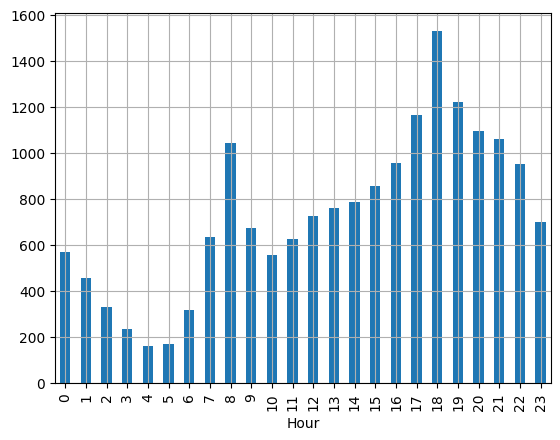

In [ ]:
#Plot hour and count to see if time of day people rent more
display(df.Hour)
display(df.Hour.value_counts())
display(df.Hour.describe())
display(df.groupby('Hour')['Rented Bike Count'].mean())
df.groupby('Hour')['Rented Bike Count'].mean().plot(kind='bar') #groupby hour and select rented bike coounts and show mean
plt.grid()

Everything looks normal

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,8760,2018-05-31 23:59:59.999999744,2017-12-01 00:00:00,2018-03-02 00:00:00,2018-06-01 00:00:00,2018-08-31 00:00:00,2018-11-30 00:00:00,NaN
Rented Bike Count,8760.0,732.006849,2.0,221.0,576.0,1065.25,3556.0,631.974431
Hour,8760.0,11.5,0.0,5.75,11.5,17.25,23.0,6.922582
Temperature(°C),8760.0,12.882922,-17.799999,3.5,13.7,22.5,39.400002,11.944825
Humidity(%),8760.0,58.226256,0.0,42.0,57.0,74.0,98.0,20.362413
Wind speed (m/s),8760.0,1.724909,0.0,0.9,1.5,2.3,7.4,1.0363
Visibility (10m),8760.0,1436.825799,27.0,940.0,1698.0,2000.0,2000.0,608.298712
Dew point temperature(°C),8760.0,4.073813,-30.6,-4.7,5.1,14.8,27.200001,13.060369
Solar Radiation (MJ/m2),8760.0,0.569111,0.0,0.0,0.01,0.93,3.52,0.868746
Rainfall(mm),8760.0,0.148687,0.0,0.0,0.0,0.0,35.0,1.128193


### DoW

In [ ]:
numeric_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Spring',
       'Summer', 'Winter', 'Day', 'Month', 'DoW', 'Weekend'],
      dtype='object')

In [ ]:
df['DoW'] = df['DoW'].astype('int32')

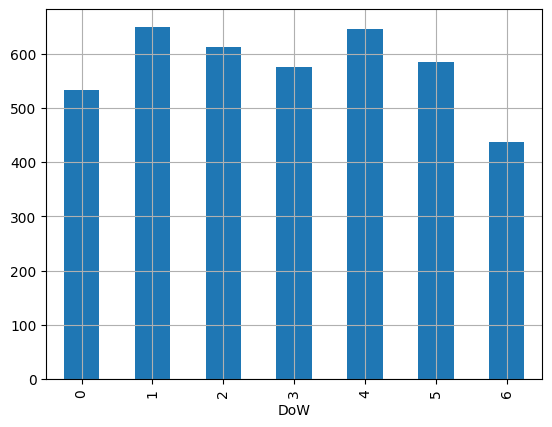

In [ ]:
#Plot Day of Week with Rented Bike Count, needed to use my numeric_df - no categorical
numeric_df.groupby('DoW').median()['Rented Bike Count'].plot(kind='bar')
plt.grid()

### Temperature

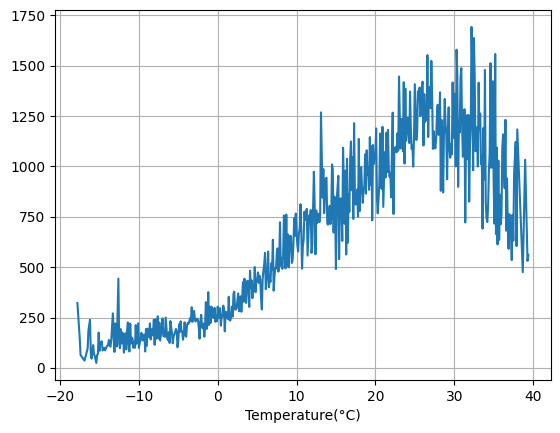

In [ ]:
#Plot Temperature or had to switch because of duplicates of Temp for different Rented Bike Count
df.groupby('Temperature(°C)')['Rented Bike Count'].mean().plot()
plt.grid()

### Date

Preparation for Groupby

In [ ]:
print(df['Date'].dtype) #check orrect data type
print(df['Rented Bike Count'].dtype) #check orrect data type
print(df[['Date', 'Rented Bike Count']].isna().sum()) #check if missing values

datetime64[ns]
int32
Date                 0
Rented Bike Count    0
dtype: int64


In [ ]:
#Identify Duplicates
print(df[df.duplicated(subset=['Date'], keep=False)])

           Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-12-01                254     0             -5.2           37   
1    2017-12-01                204     1             -5.5           38   
2    2017-12-01                173     2             -6.0           39   
3    2017-12-01                107     3             -6.2           40   
4    2017-12-01                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000

In [ ]:
df['Date'] = pd.to_datetime(df['Date']) #convert if need
df['Rented Bike Count'] = pd.to_numeric(df['Rented Bike Count'], errors='coerce') #convert if need
mean_values = df.groupby('Date')['Rented Bike Count'].mean() #check that it works before plotting, had to switch order from df.groupby('Date).mean()['Rented Bike Count']

(array([], dtype=int64),)

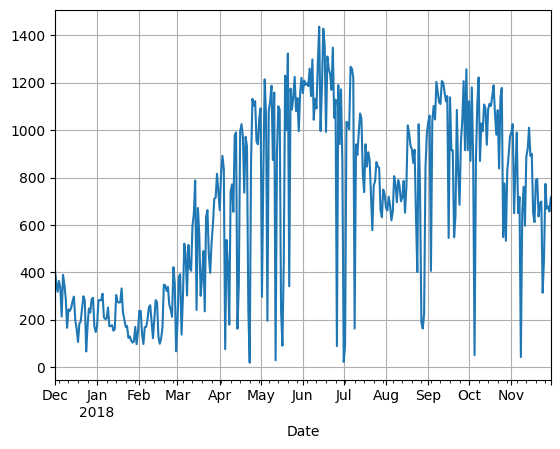

In [ ]:
#Saw the issue of it hitting zero so tells me issue or outlier
df.groupby('Date')['Rented Bike Count'].median().plot() #can also try mean but didn't change a lot
plt.grid()
display(np.where(df['Rented Bike Count']==0)) #list the places where it hits zero

In [ ]:
#Take a look at subset of the zeroes and nonzeros from the dataframe = DIDN'T COME UP IN 'NA'
df.loc[[3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153]]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Spring,Summer,Winter,Day,Month,DoW,Weekend
3143,2018-04-10,212,23,15.1,83,4.1,1147,12.2,0.00,3.0,0.0,0,1,1,0,0,10,4,1,0
3144,2018-04-11,655,0,14.4,82,4.6,1041,11.3,0.00,0.0,0.0,0,0,1,0,0,11,4,2,0
3145,2018-04-11,655,1,13.6,81,3.6,886,10.3,0.00,0.0,0.0,0,0,1,0,0,11,4,2,0
3146,2018-04-11,655,2,12.7,80,3.9,885,9.3,0.00,0.0,0.0,0,0,1,0,0,11,4,2,0
3147,2018-04-11,655,3,11.6,81,3.1,687,8.4,0.00,0.0,0.0,0,0,1,0,0,11,4,2,0
3148,2018-04-11,655,4,10.2,83,3.5,554,7.4,0.00,0.0,0.0,0,0,1,0,0,11,4,2,0
3149,2018-04-11,655,5,9.7,84,1.7,447,7.1,0.00,0.0,0.0,0,0,1,0,0,11,4,2,0
3150,2018-04-11,655,6,9.0,86,2.0,442,6.7,0.00,0.0,0.0,0,0,1,0,0,11,4,2,0
3151,2018-04-11,655,7,8.8,85,1.1,438,6.4,0.11,0.0,0.0,0,0,1,0,0,11,4,2,0
3152,2018-04-11,655,8,9.7,77,1.6,519,5.8,0.68,0.0,0.0,0,0,1,0,0,11,4,2,0
